## Pytorch WorkFlow

lets explore a an example PyTorch end-to-end workflow

Resouces:
* Ground truth notebook -https://github.com/mrdbourke/pytorch-deep-learning/tree/main
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/


In [1]:
what_is_covering = {1: "data (prepering and loading)",
                    2: "building model",
                    3: "fitting the model to data (treining)",
                    4: "making predictions and evalueting a model (inference)",
                    5: "saving and loading a model",
                    6: "putting it all together"
}
what_is_covering

{1: 'data (prepering and loading)',
 2: 'building model',
 3: 'fitting the model to data (treining)',
 4: 'making predictions and evalueting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn  # nn contains all of pytorch`s building blocks for neural networks
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.0.1+cu118'

# data (prepering and loading)

data can be anything... in machine learning.

* exel spreadseet
* Images of any kind
* Videos (Youtube has a lot of data...)
* Audio like songs or podcasts
* DNA
* Text

Maching Learning is a game of two parts:
1. Get data into a numerical representations.
2. Build a model to learn patters in that numerical representation.

to show case this, let`s create some *know* data using the linear regresion formula.

we`ll use a linear regression formula to make a straight line with *know* **parameters**.

In [3]:
# create *know* parameters

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

## Spliting data into treining and test sets (one of the most import concepts in ML in general)
let`s create a training and test set with our data.

In [5]:
train_split = int(0.8 * len(X))
train_split
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

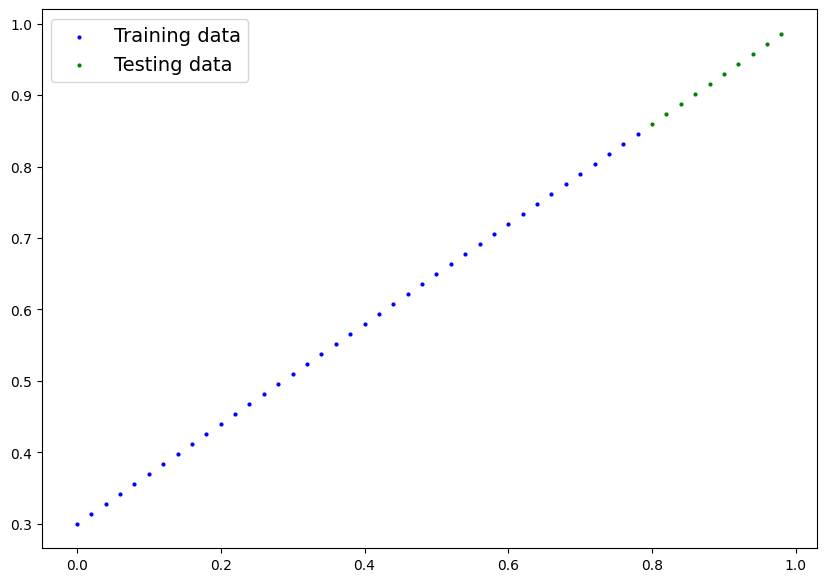

In [7]:
plot_predictions();

## 2. building model

out first pyTorch model!

a bit o classes in this link:
https://realpython.com/python3-object-oriented-programming/

What this model does:
* start with random values (weight and bias)
* look at training data and adjust the random values to better represent (as possible) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent: https://www.youtube.com/watch?v=IHZwWFHWa-w&ab_channel=3Blue1Brown
2. backpropagation: https://www.youtube.com/watch?v=Ilg3gGewQ5U&t=3s&ab_channel=3Blue1Brown

In [25]:
# create linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module): # <- almost everything in pytorch from nn.Modele
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype=torch.float))
  # foward mothod to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is a input data
    return self.weight * x + self.bias #formula from linear regresion

### pyTorch model building essesentials

* torch.nn - contains all the buildings for computations graphs (a neural network can be consider a computational graph)
* torch.nn.Parameter - what parameter should our model try and learn, often a pytorh layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation
see more on: https://pytorch.org/tutorials/beginner/ptcheat.html?highlight=cheat


### cheking the contents of our PyTorch model

Now we`ve created a model, let's see what's inside...

so we can check our model parameters or what's inside our model using `.parameters()`  

In [26]:
# Create a random seed
torch.manual_seed(4444)

# Create a intence of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()
# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.7605], requires_grad=True),
 Parameter containing:
 tensor([-1.0284], requires_grad=True)]

In [27]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.7605])), ('bias', tensor([-1.0284]))])

### Making predicitions using `torch.inference_mode()`

to check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method

In [28]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [29]:
## make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[-0.4200],
        [-0.4048],
        [-0.3896],
        [-0.3744],
        [-0.3592],
        [-0.3440],
        [-0.3288],
        [-0.3136],
        [-0.2984],
        [-0.2831]])

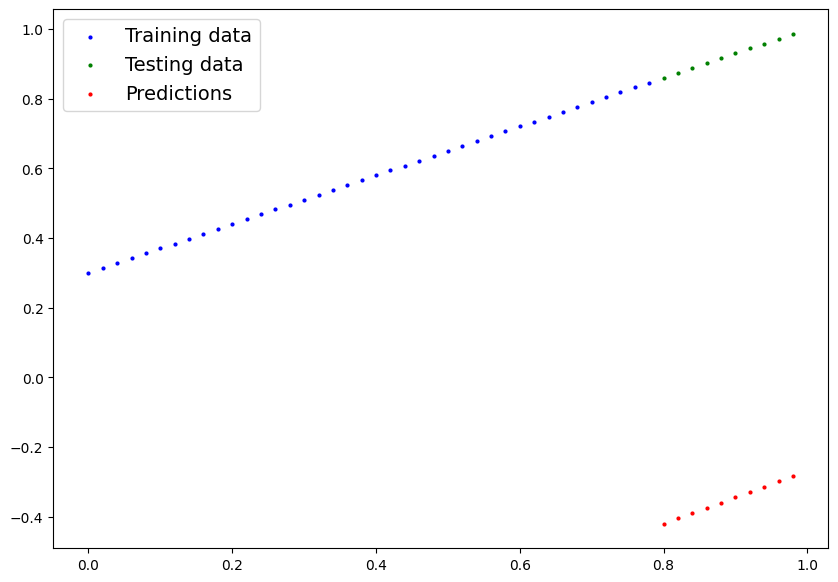

In [30]:
plot_predictions(predictions=y_preds)

## 3. train model

the hole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *knwon* parameters.

or in other words from a poor representation of the data to a better representantion of the data.

One way to measure how wrong or how poor your models predictions are, is to use a loss functions

Note: loss function may also be called as cost function or criterion in different areas. For our case, loss function.

Things we need to train:

* **Loss function:** A function fo measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the accountthe loss of a model and ajust the models parameters (e. g. weight and biases)

And specifically for PyTorch, we need:

* A treining loop
* A testing loop

In [32]:
model_0.parameters()

<generator object Module.parameters at 0x7853db335e70>

In [33]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.7605])), ('bias', tensor([-1.0284]))])

In [40]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup a optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001) # lr = leaning rate = possibly the most important hyperparameter you can set

In [41]:
loss_fn

L1Loss()

**Q:** Which loss function and optimizer should i use:

**A:** this will be problem specific. But with experience, you'll get an idea of what works and what doesn't with particular problem set.

for exemple, for a regression probrem (like ours), a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffice.
But for a classification problem like whether a photo is a dog or a cat, you'll likely wantto use a loss function of nn.BCELoss() (binary cross entropy loss)

### Building a training loop (and a testing loop) in PyTorch

a couple of things we need in a training loop:
0. loop throughthe data
1. forward pass (this involves data moving thrugh our model's `forward()` fuinctions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradient of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optmizer to adjust our model's parameters to try and improve the loss (**gradient decent**)

In [44]:
with torch.no_grad():
  list(model_0.parameters())

In [43]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.7605], requires_grad=True),
 Parameter containing:
 tensor([-1.0284], requires_grad=True)]

In [ ]:
# An epoch is one loop through the data... (this is a hyperparameter becouse we've set it ourselves)
epochs = 1

### treining
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() #train mode in PyTorch sets all parameters that require gradients to require gradients

  #1. forward pass
  y_pred = model(X_train)

  #2. calculate the loss
  loss = loss_fn(y_pred, y_train)
 z
  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer chages will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  model_0.eval() # turns off gradients tracking